Polynomial Regression (degree=2) for SO2TONS at LAKE-1:
  RMSE: 0.0001
  R²: -16.4821


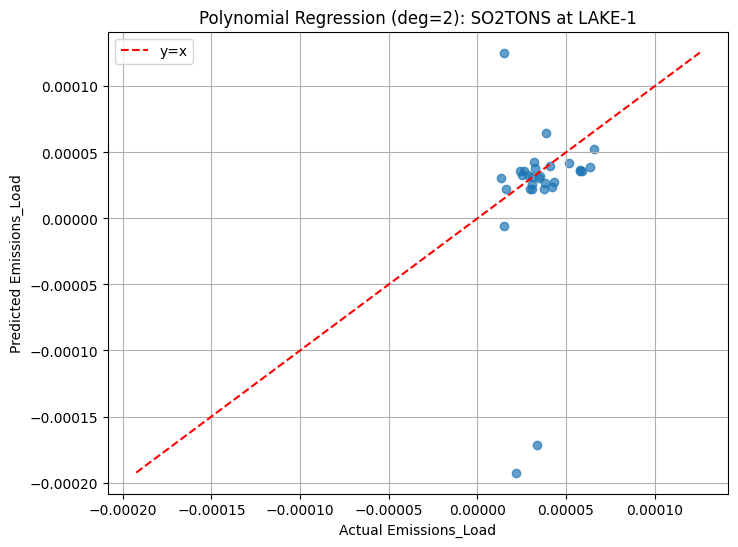

Polynomial Regression (degree=2) for SO2TONS at LAKE-2:
  RMSE: 0.0000
  R²: -1.7955


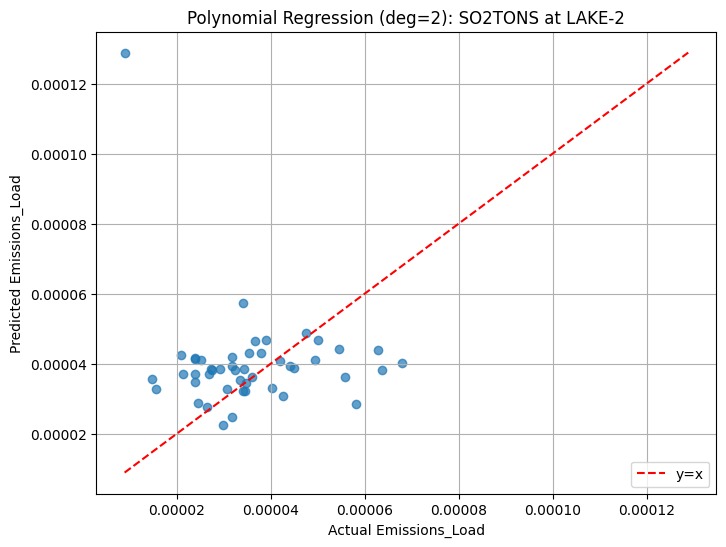

Polynomial Regression (degree=2) for SO2TONS at LAKE-3:
  RMSE: 0.0000
  R²: 0.1120


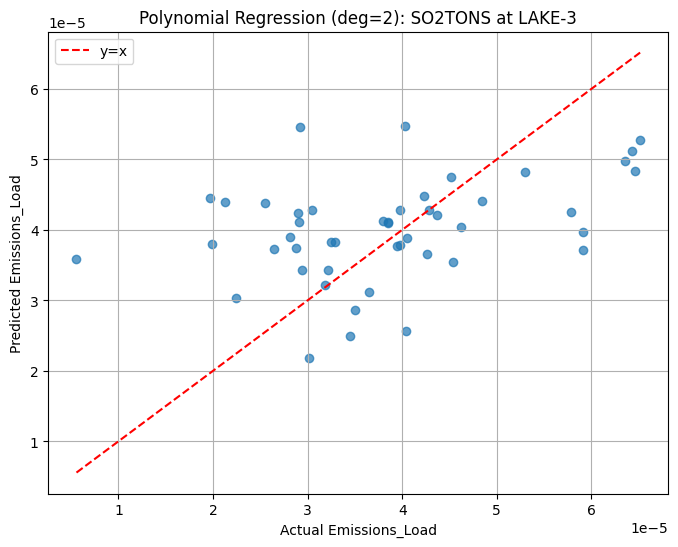

Polynomial Regression (degree=2) for SO2TONS at LAKE-4:
  RMSE: 0.0000
  R²: -2.4938


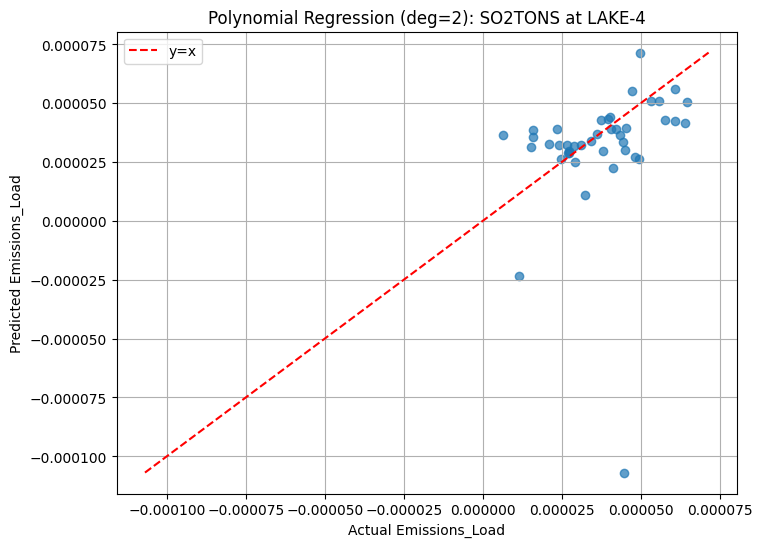

Polynomial Regression (degree=2) for NOXTONS at LAKE-1:
  RMSE: 0.0003
  R²: -0.2565


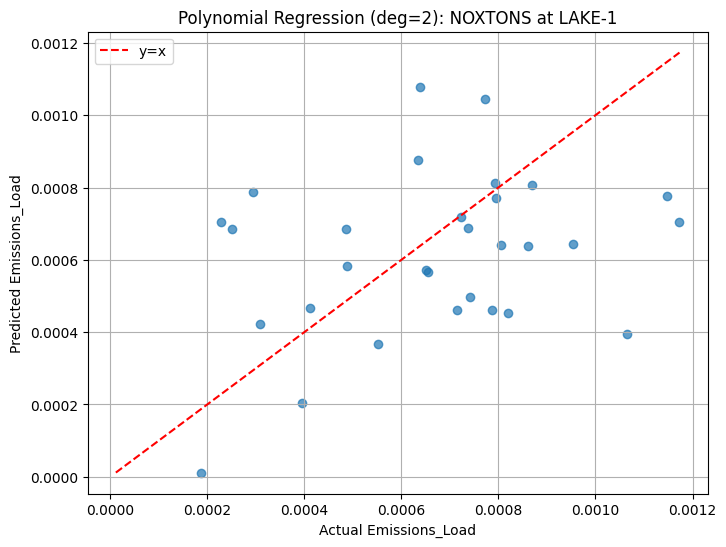

Polynomial Regression (degree=2) for NOXTONS at LAKE-2:
  RMSE: 0.0003
  R²: -1.3145


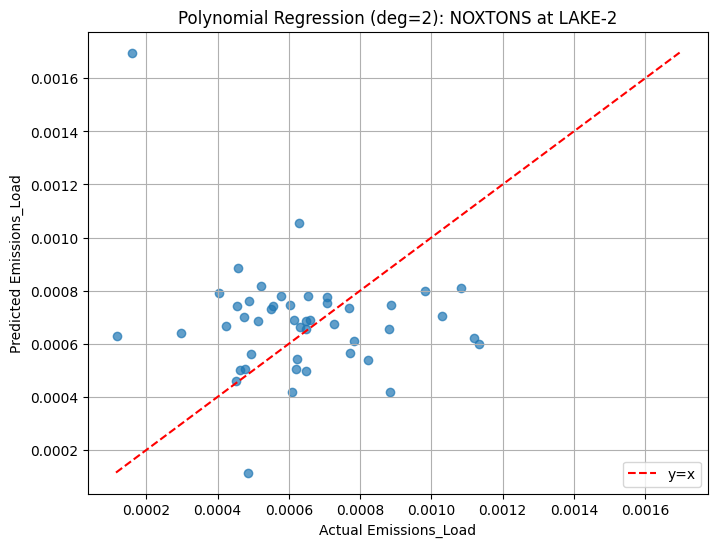

Polynomial Regression (degree=2) for NOXTONS at LAKE-3:
  RMSE: 0.0002
  R²: 0.1083


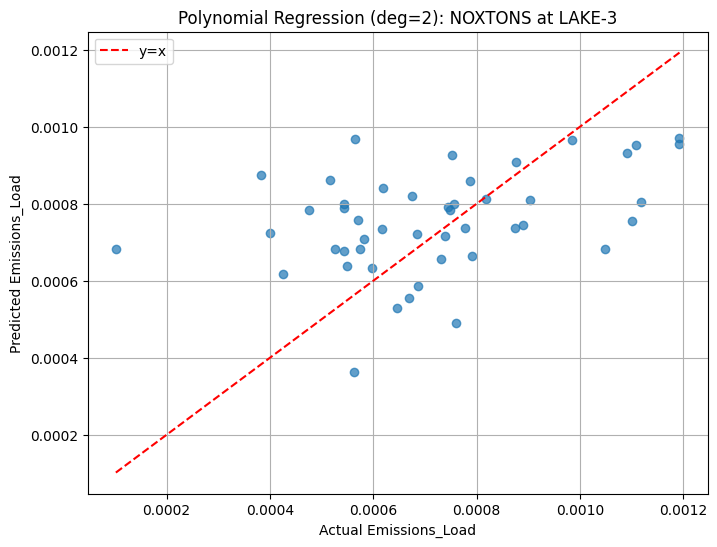

Polynomial Regression (degree=2) for NOXTONS at LAKE-4:
  RMSE: 0.0002
  R²: 0.2252


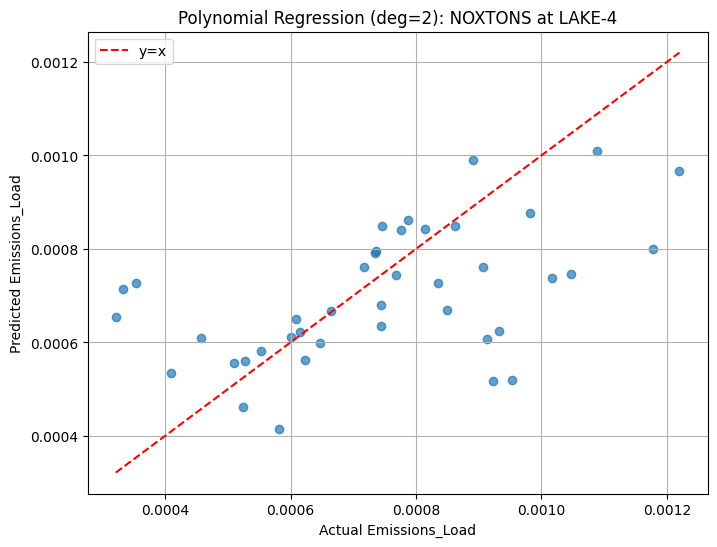

Polynomial Regression (degree=2) for COTONS at LAKE-1:
  RMSE: 0.0026
  R²: -722.6842


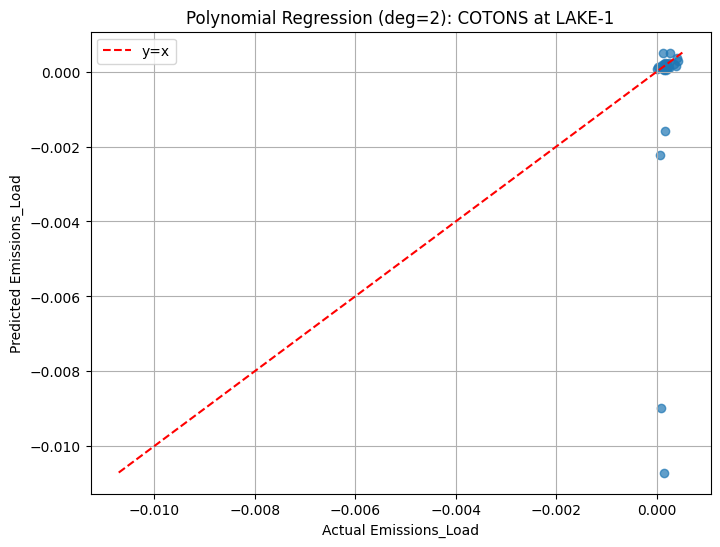

Polynomial Regression (degree=2) for COTONS at LAKE-2:
  RMSE: 0.0001
  R²: -0.5693


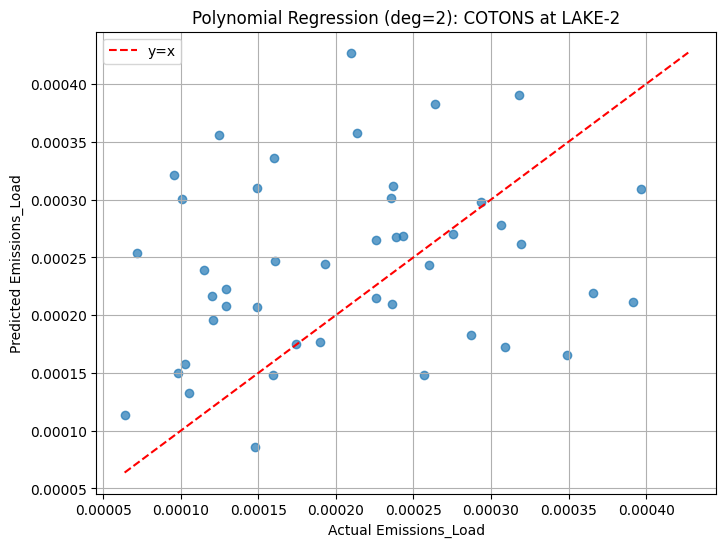

Polynomial Regression (degree=2) for COTONS at LAKE-3:
  RMSE: 0.0001
  R²: 0.0657


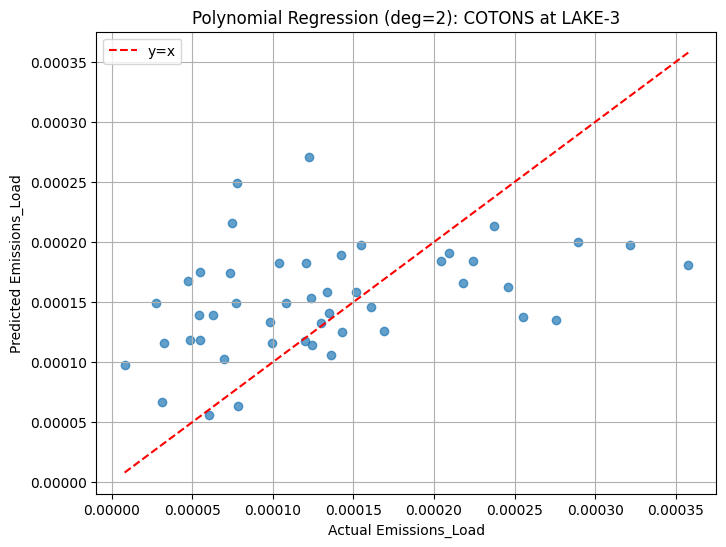

Polynomial Regression (degree=2) for COTONS at LAKE-4:
  RMSE: 0.0001
  R²: 0.1945


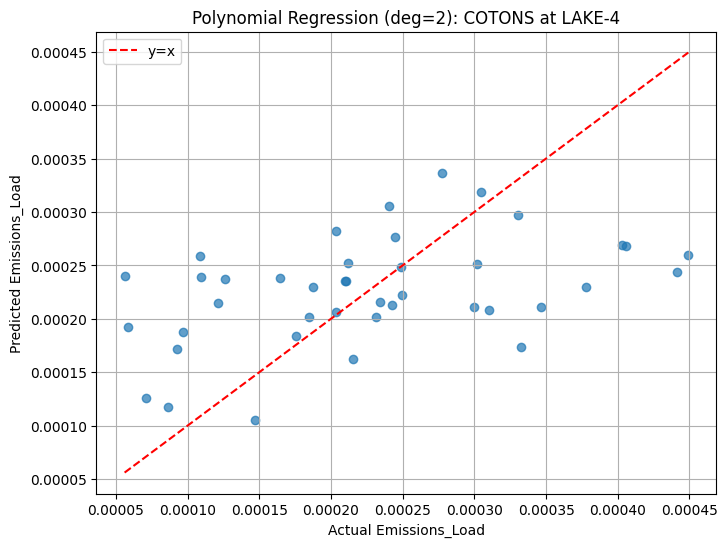


Final Predictions:
SO2TONS at LAKE-1:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0, 'snow': 0.0, 'wdir': 87.0, 'wspd': 11.2, 'pres': 1011.3}
  Actual Emissions_Load: 0.0000
  Predicted Emissions_Load: 0.0000

SO2TONS at LAKE-2:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0, 'snow': 0.0, 'wdir': 87.0, 'wspd': 11.2, 'pres': 1011.3}
  Actual Emissions_Load: 0.0000
  Predicted Emissions_Load: 0.0000

SO2TONS at LAKE-3:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0, 'snow': 0.0, 'wdir': 87.0, 'wspd': 11.2, 'pres': 1011.3}
  Actual Emissions_Load: 0.0000
  Predicted Emissions_Load: 0.0000

SO2TONS at LAKE-4:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0, 'snow': 0.0, 'wdir': 87.0, 'wspd': 11.2, 'pres': 1011.3}
  Actual Emissions_Load: 0.0000
  Predicted Emissions_Load: 0.0000

NOXTONS at LAKE-1:
  Features: {'tavg': 31.7, 'tmin': 23.3, 'tmax': 38.9, 'prcp': 0.0, 'snow': 0.0, 'wdir': 87.0, 'wspd': 11.2, 'pre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# URLs for datasets
datasets = {
    "SO2TONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv",
    "NOXTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/NOXTONS_dataset.csv",
    "COTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/COTONS_dataset.csv"
}

# Define the peak season months (May through August)
peak_season_months = [5, 6, 7, 8]

# Define lakes (sources)
sources = ["LAKE-1", "LAKE-2", "LAKE-3", "LAKE-4"]

# Define the specific day for prediction
specific_date = pd.Timestamp("2022-07-15")

# Initialize dictionaries to store models and predictions for verification
models = {}
predictions = {}

# Loop through each dataset (SO2TONS, NOXTONS, COTONS)
for parameter, url in datasets.items():
    # Load the dataset
    data = pd.read_csv(url)

    # Convert the 'date' column to datetime and filter for peak season
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'].dt.month.isin(peak_season_months)]

    # Separate data by source
    for source in sources:
        source_data = data[data['Source'] == source]

        # Check if there is enough data
        if source_data.empty or len(source_data) < 10:
            print(f"Not enough data for {parameter} at {source}. Skipping...")
            continue

        # Define predictors and target
        predictors = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
        target = 'Emissions_Load'

        # Drop rows with missing values
        source_data = source_data.dropna(subset=predictors + [target])

        # Prepare features and target
        X = source_data[predictors]
        y = source_data[target]

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Build a Pipeline for polynomial regression:
        #  1. Scale features
        #  2. Generate polynomial features (degree=2 by default, can be adjusted)
        #  3. Fit a linear regression model to these polynomial features
        polynomial_degree = 2  # You can experiment with higher degrees
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
            ('linreg', LinearRegression())
        ])

        # Train the pipeline
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"Polynomial Regression (degree={polynomial_degree}) for {parameter} at {source}:")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")

        # Save the model
        models[(parameter, source)] = model

        # ---------------------------
        # Plot: Predicted vs. Actual with correct y=x line
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)

        # Determine the min and max values across both y_test and y_pred for the y=x line
        min_val = min(np.min(y_test), np.min(y_pred))
        max_val = max(np.max(y_test), np.max(y_pred))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y=x")

        plt.xlabel("Actual Emissions_Load")
        plt.ylabel("Predicted Emissions_Load")
        plt.title(f"Polynomial Regression (deg={polynomial_degree}): {parameter} at {source}")
        plt.legend()
        plt.grid(True)
        plt.show()

        # ---------------------------
        # Predict for a specific day if available (for verification)
        day_data = source_data[source_data['date'] == specific_date]
        if not day_data.empty:
            X_day = day_data[predictors]
            y_day = day_data[target].iloc[0]

            # Make prediction using the same pipeline
            day_pred = model.predict(X_day)[0]

            predictions[(parameter, source)] = {
                "features": X_day.iloc[0],
                "actual": y_day,
                "predicted": day_pred
            }

# Display all predictions at the end
print("\nFinal Predictions:")
for key, value in predictions.items():
    parameter, source = key
    print(f"{parameter} at {source}:")
    print(f"  Features: {value['features'].to_dict()}")
    print(f"  Actual Emissions_Load: {value['actual']:.4f}")
    print(f"  Predicted Emissions_Load: {value['predicted']:.4f}")
    print()
